# Quick DITL Example

## Introduction

This notebook demonstrates a basic Day-In-The-Life (DITL) simulation using COASTSim. We'll set up a spacecraft configuration, compute its orbit, add observation targets, run the simulation, and visualize the results.

## Step 1: Import Libraries

We start by importing the necessary libraries for configuration, ephemeris computation, visualization, and simulation.

In [1]:
%matplotlib widget
from datetime import datetime

import numpy as np
from rust_ephem import TLEEphemeris

from conops.config.config import MissionConfig
from conops.ditl.queue_ditl import QueueDITL
from conops.visualization import plot_ditl_timeline, plot_sky_pointing

## Step 2: Create Spacecraft Configuration

Create a basic spacecraft configuration using MissionConfig. This sets up default parameters for the spacecraft bus, solar panels, payload, etc.

In [ ]:
config = MissionConfig()

{'name': 'Default Config',
 'spacecraft_bus': {'name': 'Default Bus',
  'power_draw': {'nominal_power': 50,
   'peak_power': 300,
   'power_mode': {},
   'eclipse_power': None,
   'eclipse_power_mode': {}},
  'attitude_control': {'slew_acceleration': 0.5,
   'max_slew_rate': 0.25,
   'slew_accuracy': 0.01,
   'settle_time': 120.0},
  'communications': None,
  'heater': None,
  'data_generation': {'rate_gbps': 0.0, 'per_observation_gb': 0.0}},
 'solar_panel': {'name': 'Default Solar Panel',
  'panels': [{'name': 'Panel',
    'gimbled': False,
    'sidemount': True,
    'cant_x': 0.0,
    'cant_y': 0.0,
    'azimuth_deg': 0.0,
    'max_power': 800.0,
    'conversion_efficiency': None}],
  'conversion_efficiency': 0.95},
 'payload': {'payload': [{'name': 'Default Instrument',
    'power_draw': {'nominal_power': 50.0,
     'peak_power': 100.0,
     'power_mode': {},
     'eclipse_power': None,
     'eclipse_power_mode': {}},
    'heater': None,
    'data_generation': {'rate_gbps': 0.0, 'pe

## Step 3: Set up Ephemeris

Load the spacecraft's orbital ephemeris from a TLE file. This defines the
spacecraft's position over time for the simulation period. The ephemeris
pre-calculates the position of the spacecraft, along with the positions of the
Sun and Moon, for every time interval from beginning to end, with a interval of
60 seconds. We use the `rust-ephem` library to compute this for speed.

In [3]:
ephemeris = TLEEphemeris(
    begin=datetime(2025, 12, 1, 0, 0, 0),
    end=datetime(2025, 12, 2, 0, 0, 0),
    step_size=60,
    tle="example.tle",
)

UT1 provider initialized successfully (EOP2 short, cached)


## Step 4: Create DITL and Add Observations

Create a DITL (Data in the Life) simulation object and populate it with random
astronomical observations. Each observation has a random sky position, fixed 1ks
exposure time, and a unique observation ID.

When initializing the DITL, we pass it the `MissionConfig` and `Ephemeris`
objects as arguments.

In [4]:
ditl = QueueDITL(config=config, ephem=ephemeris)

# Add 1000 random observations to the observation queue
for i in range(1000):
    ditl.queue.add(
        ra=np.random.uniform(0, 360),
        dec=np.random.uniform(-90, 90),
        exptime=1000,
        obsid=10000 + i,
    )

## Step 5: Run the Simulation

Execute the DITL calculation to simulate the spacecraft operations, including
scheduling observations, managing power, thermal constraints, and
communications.

QueueDITL uses a queue scheduler, so it schedules targets on the fly during the
DITL. The end result is much the same as if we had pre-created a schedule.

In [5]:
ditl.calc()

True

## Step 6: Visualize Results

Plot the results of the simulation, showing the sky pointing and timeline of
spacecraft operations. 

Figure 1 is an interactive map that shows the pointing of the spacecraft over
time along with various obserinv constraints that are defined by the default
configuration, most prominently the Earth (+ some limb avoidance angle), the
Moon and the Sun.

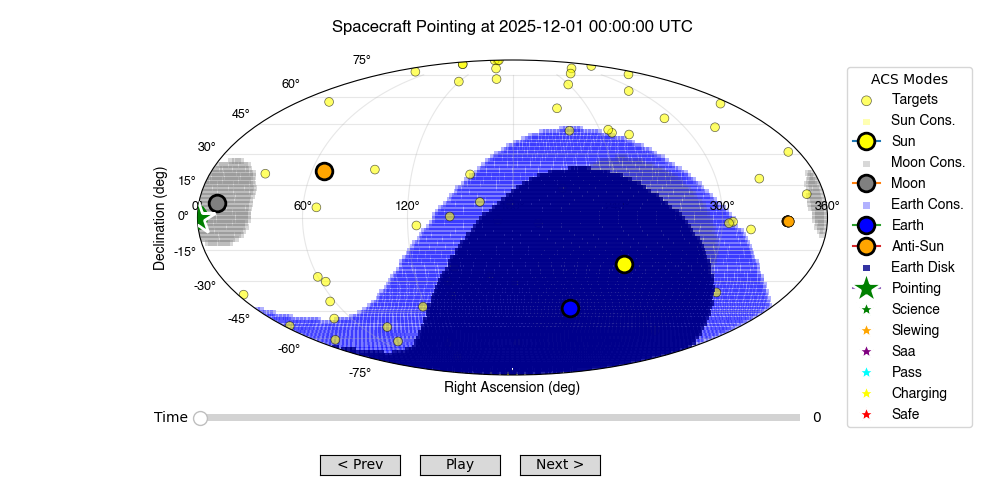

In [6]:
_ = plot_sky_pointing(ditl, figsize=(10, 5))

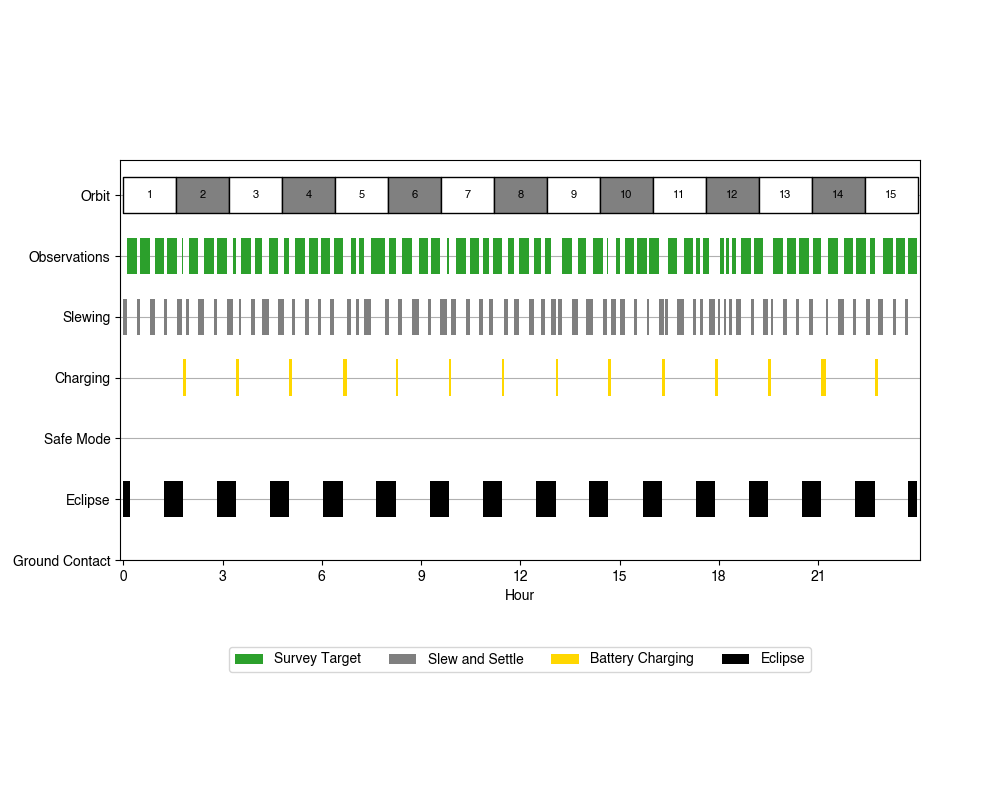

In [7]:
_ = plot_ditl_timeline(ditl, figsize=(10, 8))